<a href="https://colab.research.google.com/github/kang9366/PetKeeper_DeepLearning/blob/main/Blur_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# open cv packege
import cv2
from cv2 import IMREAD_COLOR,IMREAD_UNCHANGED

# useful packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# statistic packeges
from scipy.ndimage import variance
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import laplace
from skimage.transform import resize
%matplotlib inline

In [2]:
def variance_of_laplacian(img2):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    gray = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def BGR2RGB(BGR_img):
    # turning BGR pixel color to RGB
    rgb_image = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    return rgb_image

In [34]:
def blurrinesDetection(directories,threshold):
    columns = 3
    rows = len(directories)//2
    fig=plt.figure(figsize=(5*columns, 4*rows))
    for i,directory in enumerate(directories):
        fig.add_subplot(rows, columns, i+1)
        img = cv2.imread(directory)
        text = "Not Blurry"
        # if the focus measure is less than the supplied threshold,
        # then the image should be considered "blurry
        fm = variance_of_laplacian(img)
        if fm < threshold:
            text = "Blurry"
        rgb_img = BGR2RGB(img)
        cv2.putText(rgb_img, "{}: {:.2f}".format(text, fm), (10, 50),cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
        plt.imshow(rgb_img)
    plt.show()

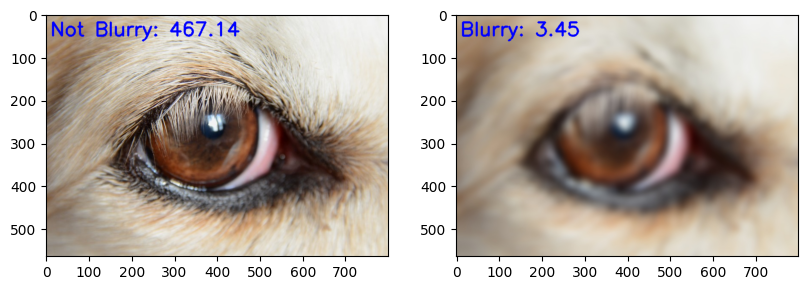

In [35]:
# directories = ['/content/test_image/{}.jpg'.format(i) for i in range(1,5)]
blurrinesDetection(['/content/test_image/clear_image.jpg', '/content/test_image/blurred_image.jpg'],300)